In [ ]:
# 데이터 처리
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 시각화 깨짐 방지 (한글 파일명 시 대비)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 출력 설정
pd.set_option('display.max_columns', None)


In [4]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 상위 5개 데이터 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 데이터 요약 정보 확인
# 데이터 프레임 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 결측치 개수 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# 기본 통계값 확인
# 수치형 데이터에 대한 요약 통계
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Age 결측치 채우기
# 이전의 177개의 결측치는 평균값 or 중앙값으로 채우기 (평균값 선택)

train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

C:\Users\민소원\AppData\Local\Temp\ipykernel_33220\56690833.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace=True)
C:\Users\민소원\AppData\Local\Temp\ipykernel_33220\56690833.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [9]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

# Fare 결측치 채우기 (test 데이터)
# 평균값으로 채우기
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

# Embarked 결측치 채우기 
# 탑승항구는 2개 정도만 결측이라 최빈값으로 채우기 
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])


In [10]:
# Sex, Embarked -> 숫자로 변환
# 모델에 넣기 위해서는 문자열 -> 숫자형으로 바꿔야 함

# 성별 : male -> 0 , female -> 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Embarked : S -> 0, C -> 1, Q -> 2
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [14]:
# Cabin, Ticket, Name 제거
# 지금은 이 세 칼럼을 활용하기 어려우니 일단 제거하고 진행
train.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True, errors='ignore')
test.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True, errors='ignore')

In [15]:
# 전처리 후 데이터 확인
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [16]:
# 머신러닝 모델 만들기 + 예측하기

# (1) 사용할 특성과 타겟 지정하기
# 예측에 사용할 특성 (Features)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# 문자형 데이터를 숫자로 바꾸기 위한 변환 (get_dummies)
# get_dummies() 는 sex, embarked 같은 범주형 데이터를 숫자로 바꿔줌. (원-핫 인코딩)
x_train = pd.get_dummies(train[features])
x_test = pd.get_dummies(test[features])

# 타겟값 (생존 여부)
y_train = train['Survived']



In [18]:
# (2) 모델 선택 및 학습 (예 : 랜덤 포레스트)

from sklearn.ensemble import RandomForestClassifier

# 모델 생성
model = RandomForestClassifier(random_state=42)

# 학습
model.fit(x_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
# 테스트 데이터로 예측
predictions = model.predict(x_test)

In [21]:
# 결과 저장 
# PassengerID 와 예측값으로 제출 파일 만들기
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived' : predictions})

# csv로 저장
output.to_csv('titanic_result.csv', index=False)

print("🎉 결과 파일이 생성되었습니다!")


🎉 결과 파일이 생성되었습니다!


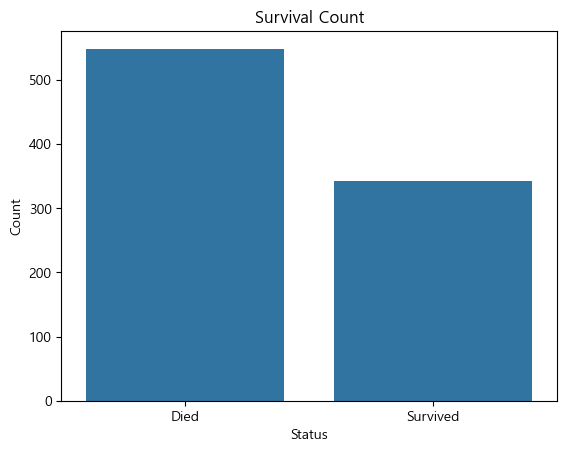

In [22]:
# 생존자 비율 시각화 (Survived 분포)

# 생존자와 사망자 수를 막대그래프로 표현
sns.countplot(data=train, x='Survived')

# 그래프 제목과 x 축 레이블 지정
plt.title('Survival Count')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.xlabel('Status')
plt.ylabel('Count')

# 그래프 보여주기
plt.show()

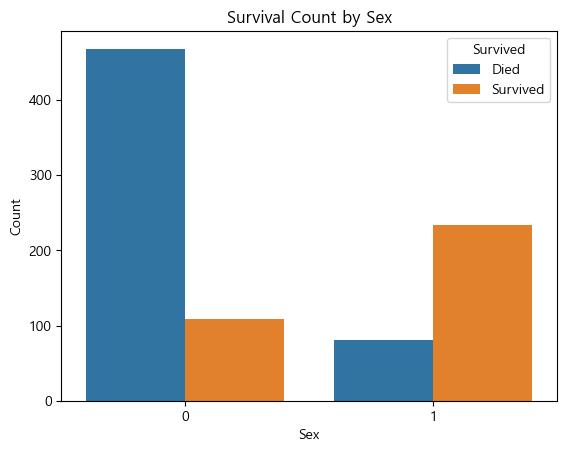

In [24]:
# 성별에 따른 생존자 수 시각화
sns.countplot(data=train, x='Sex', hue='Survived')

# 그래프 제목과 라벨
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Died', 'Survived'])

# 그래프 출력
plt.show()

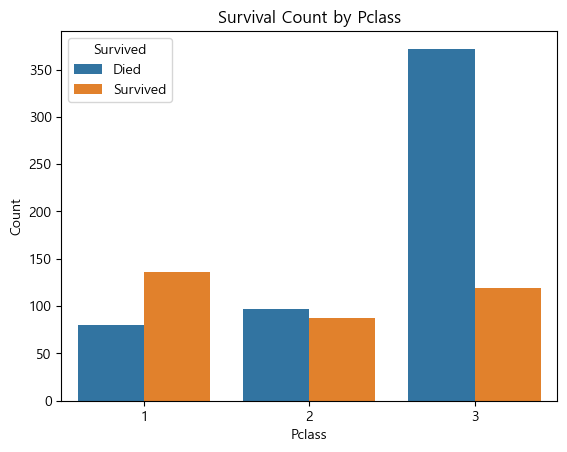

In [25]:
# 선실 등급(pclass)에 따른 생존자 수 시각화
sns.countplot(data=train, x='Pclass', hue='Survived')

# 그래프 제목과 라벨
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Died', 'Survived'])

# 그래프 출력
plt.show()

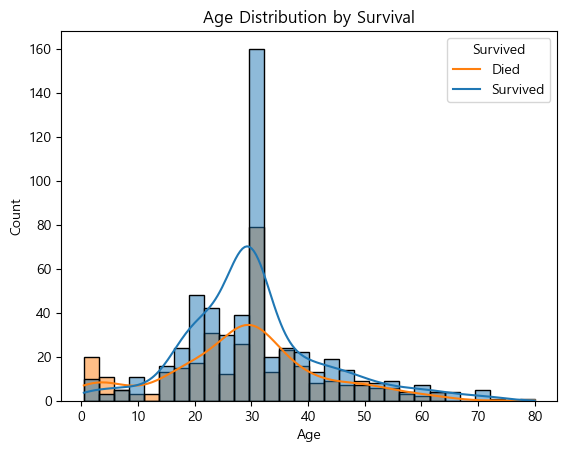

In [26]:
# 나이에 따른 생존 분포 시각화
# 히스토그램

plt.Figure(figsize=(10,5))

sns.histplot(data=train, x='Age', hue='Survived', kde=True, bins=30)

# 그래프 제목과 라벨
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Died', 'Survived'])

# 그래프 출력
plt.show()